In [42]:
import numpy as np
# import pandas as pd
from IPython.display import display

from PIL import Image
from io import BytesIO
from urllib import request

from sklearn.cluster import DBSCAN

import tensorflow as tf
from tensorflow import keras

# from tensorflow.keras.preprocessing.image import load_img
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from tensorflow.keras.applications.xception import Xception
# from tensorflow.keras.applications.xception import preprocess_input
# from tensorflow.keras.applications.xception import decode_predictions

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings(action='ignore')

In [36]:
# my_model = keras.models.load_model("/kaggle/working/mask_model_c32_p2.h5")

detection_model = keras.models.load_model("/homw/winx/dice-detection-project/dice-detection-model-14-0.948.h5")
detection_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 dropout_3 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                       

In [108]:
img_size = 128

classes = [
    'd10',
    'd12',
    'd20',
    'd4',
    'd6',
    'd8',
    'dicesback'
]

# start_path = '/kaggle/input/dice-d4-d6-d8-d10-d12-d20-images/dice' # for categorical sampling dice vs dice
# start_path = '/kaggle/working/dice' # for binary sampling dice vs blanc
# path = f"{start_path}/dice/valid/d10"
# file = "d10_top179.jpg"

lst = [
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230109_011654__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230109_013921__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230109_014133__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205235__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205256__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205346__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205406__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205427__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011213__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011222__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011232__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011243__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011252__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011303__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011323__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011335__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011343__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011354__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230112_193332__01.jpg"
]

lst_d10 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230110_205427__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_192635__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_192652__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_192848__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_192853__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_193157__01.jpg"
]

lst_d12 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192520__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192534__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192546__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192834__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192841__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193148__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193213__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193259__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193327__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193332__01.jpg"
]

lst_d20 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230110_205406__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192626__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192722__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192933__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192939__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192939__02.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_193253__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_193309__01.jpg"
]

lst_d4 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230110_205235__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230110_205256__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192658__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192703__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192758__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192807__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192900__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192912__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_193052__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_193106__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_193125__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_193131__01.jpg",
]

lst_d6 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d6/IMG_20230112_192616__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d6/IMG_20230112_192709__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d6/IMG_20230112_192816__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d6/IMG_20230112_193207__01.jpg",
]

lst_d8 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230109_011654__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230109_013921__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230110_205346__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192641__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192646__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192715__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192920__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192927__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_193034__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_193041__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_193224__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_193231__01.jpg",
]

lst_back = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-IMG_20230110_205256__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color001.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color223.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color338.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color501.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color604.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_off-angle_0231.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_color095.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_color263.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_color351.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_wood611.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_wood888.jpg"
]

lst_few = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/few-dices/IMG_20230109_014133__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/few-dices/IMG_20230116_002416__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/few-dices/IMG_20230116_002559__01.jpg"
]


def download_image(url):
    
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

def preprocess(X, rescale=255):
    
    if rescale:
        X = X*1./rescale
        return X

    return X

def layer_visualization(test_img, model, preprocess=preprocess, n_layer=4, img_size=299):
    
    if not isinstance(test_img, np.ndarray):
        x = np.array(test_img)
        X = np.array([x])
        X = preprocess(X)
    else:
        X = np.array([test_img])
    
    inputs = keras.Input(shape=(img_size, img_size, 3))

    viz_model = keras.Model(inputs=model.inputs, outputs=model.layers[n_layer].output)
    num_filters = viz_model.get_layer(index=n_layer).output.get_shape()[-1]

    display(viz_model.summary())

    features = viz_model.predict(X)[0]

    fig = plt.figure(figsize=(20, 15)) #, int(0.1*num_filters)))
    for i in range(1,features.shape[-1]):

        plt.subplot(int(num_filters/4)+1,4,i)
        plt.imshow(features[:,:,i-1] , cmap='gray')
    plt.tight_layout()
    plt.show()

def predict(X, model):

    class_prob = model.predict(X)

    return class_prob[0]

def get_feature_maps(X, model, img_size, n_layer=4):
    
    inputs = keras.Input(shape=(img_size, img_size, 3))

    viz_model = keras.Model(inputs=model.inputs, outputs=model.layers[n_layer].output)
    
    features = viz_model.predict(X)[0]
    
    return features


def get_feature_mask(feature_maps):
    """
    mask selection based on the less intercross
    """
    
    feature_maps[feature_maps > 0] = 1

    mask_sum = np.sum(np.sum(feature_maps, axis=0), axis=0)
    sel_layers = (mask_sum > 0.05*np.max(mask_sum))&(mask_sum < 0.95*np.max(mask_sum))

    selected_maps = feature_maps[:,:, sel_layers].copy()
    n = selected_maps.shape[-1]
    cross_scores = np.array([[np.sum(selected_maps[:,:, i]*selected_maps[:,:,j], dtype='int') if i<j else +np.inf for j in range(n)] for i in range(n)])

    # there can be multiple i,j combinations following upsample_mask function can handle few results
    i, j = np.where(cross_scores == np.min(cross_scores))

    print(i,j)
    if np.sum(selected_maps[:,:,i]) < np.sum(selected_maps[:,:,j]):
        fin_mask = selected_maps[:,:,i]
    else:
        fin_mask = selected_maps[:,:,j]

    # clearing the borders
    fin_mask[[0,fin_mask.shape[1]-1], :, :] = 0
    fin_mask[:, [0,fin_mask.shape[0]-1], :] = 0
        
    return fin_mask


def get_mask(features, threshold=1.5): #sample_url, viz_model, n_layer):
    """
    Mask selection based on mean feature maps approach
    """

#     sample_img_original = download_image(sample_url) 
#     sample_img = prepare_image(sample_img_original, (img_size, img_size))

#     x = np.array(sample_img)
#     X = np.array([x])
#     X = preprocess(X)

#     inputs = keras.Input(shape=(img_size, img_size, 3))

#     viz_map = keras.Model(inputs=viz_model.inputs, outputs=viz_model.layers[n_layer].output)
#     num_filters = viz_map.get_layer(index=n_layer).output.get_shape()[-1]

#     features = viz_map.predict(X)[0]
    
    num_filters = features.shape[-1]
    
    avg_map = np.mean(features)

    map_mask = [1 if avg_map<np.mean(features[:, :, i]) else 0 for i in range(num_filters)]
    
    mean_mask = np.mean(features[:,:, map_mask], axis=-1)
    
    mean_mask[mean_mask < threshold*np.mean(mean_mask)] = 0
    
    return mean_mask


def upsample_mask(f_mask):
    
    mask_size = f_mask.shape[0]

    inputs = keras.Input((mask_size, mask_size, 1))

    upsampling_1 = keras.layers.UpSampling2D(size=(2,2), interpolation="nearest")(inputs)
    upsampling_2 = keras.layers.UpSampling2D(size=(2,2), interpolation="nearest")(upsampling_1)

    mask_model = keras.Model(inputs=inputs, outputs=upsampling_2)
    
    return mask_model


def get_clusters(mask, n_map = 0):
    
    get_labels = DBSCAN(eps=5, min_samples=35)

    points = list(zip(*np.where(mask[:,:,n_map] >0)))

    if points:
        labels = get_labels.fit_predict(points)
        
        labeled_mask = np.zeros((img_size, img_size, len(np.unique(labels))))
        
        for i, j, l in zip(*(np.where(mask[:,:,n_map] >0)), labels):
            if l>=0:
                labeled_mask[i, j, l] = 1

        if np.sum(labeled_mask[:,:, -1]) == 0:
            labeled_mask = labeled_mask[:, :, :-1]

        return labeled_mask

    else:
        print("No dices detected")
        
        return None

In [3]:
def plot_boxes(sample):
#     sample = get_image(next(it))

#     # display(sample)
#     sample = np.array(sample)

    img_contours = get_contours(sample, thresh=123)

    display(plt.imshow(img_contours))

    mask = np.where(img_contours == 255)
    x_min = np.min(mask[1])
    x_max = np.max(mask[1])
    y_min = np.min(mask[0])
    y_max = np.max(mask[0])

    print(x_min, x_max, y_min, y_max)

    box_mask_hmin = [[1 if (i>=x_min)&(i<=x_max)&(j==y_min) else 0 for i in range(img_size)] for j in range(img_size)]
    box_mask_hmax = [[1 if (i>=x_min)&(i<=x_max)&(j==y_max) else 0 for i in range(img_size)] for j in range(img_size)]
    box_mask_vmin = [[1 if (i==x_min)&(j>=y_min)&(j<=y_max) else 0 for i in range(img_size)] for j in range(img_size)]
    box_mask_vmax = [[1 if (i==x_max)&(j>=y_min)&(j<=y_max) else 0 for i in range(img_size)] for j in range(img_size)]

    box_mask = np.sum([box_mask_hmin, box_mask_hmax, box_mask_vmin, box_mask_vmax], axis=0)

    boxed_sample = sample.copy()
    boxed_sample[np.where(box_mask == 1)] = 0

    plt.figure()
    plt.imshow(boxed_sample)

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_30 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_30 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 activation_30 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 dropout_30 (Dropout)        (None, 128, 128, 32)      0         
                                                                 
Total params: 1,024
Trainable params: 960
Non-trainable params: 64
_________________________________________________________

None

1/1 [==============================] - 0s 57ms/step


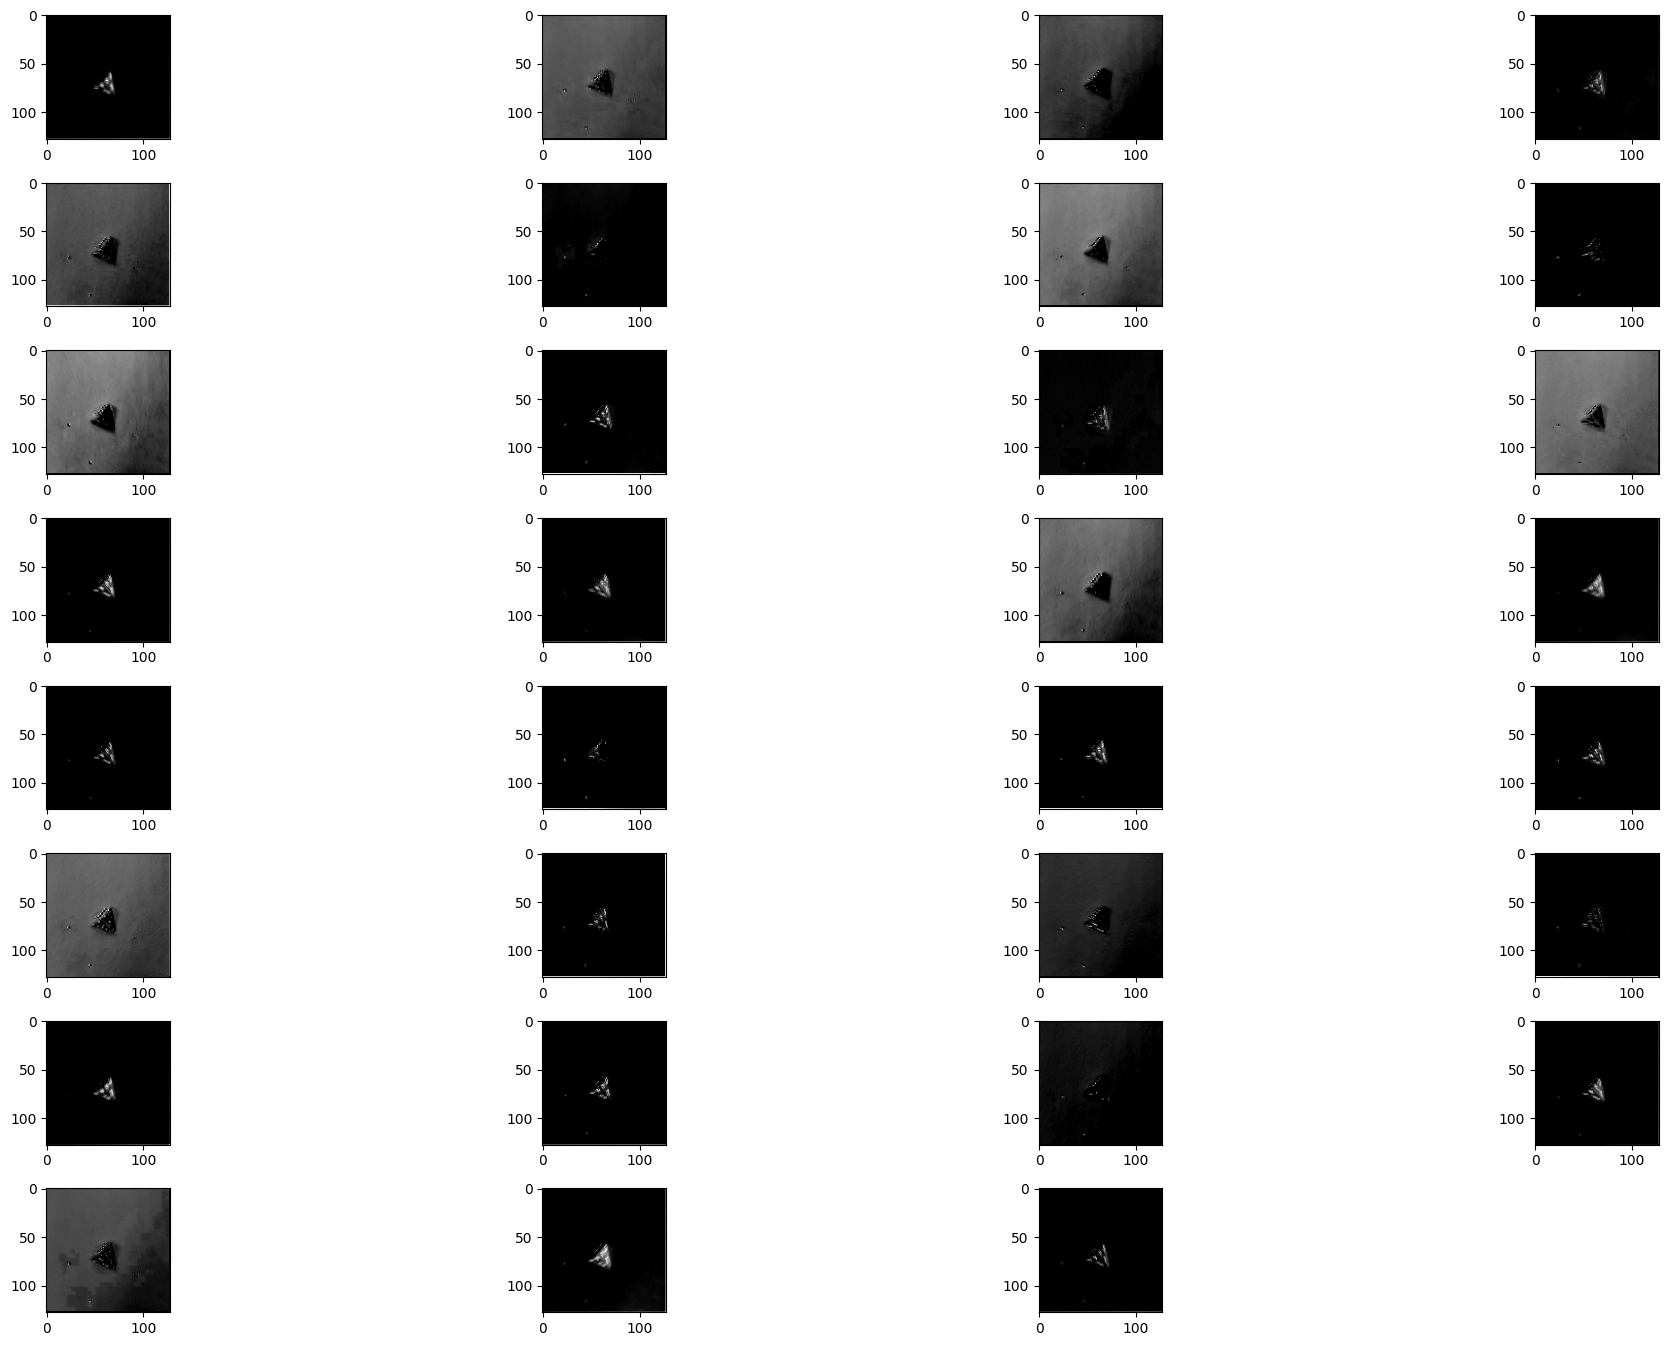

In [32]:
layer_maps = layer_visualization(sample,  detection_model, preprocess=preprocess, n_layer=4, img_size=128)

In [143]:
sample_url = lst_few[0]

sample_img_original = download_image(sample_url)
sample = prepare_image(sample_img_original, (img_size, img_size))

# display(sample)

x = np.array(sample)
x = np.array([x])
X = preprocess(x, 255)

classes_prob = predict(X, detection_model)
print(dict(zip(classes, classes_prob)))

f_maps = get_feature_maps(X, detection_model, n_layer=4, img_size=img_size)
f_mask = get_mask(f_maps, threshold=1.6)

# mask = upsample_mask(f_mask).predict(np.array([f_mask]))[0]
mask = f_mask[:,:,np.newaxis].copy()

# plt.imshow(mask)
# plt.show()

labeled_mask = get_clusters(mask)

num_mask = iter(range(labeled_mask.shape[2]))


1/1 [==============================] - 0s 16ms/step
{'d10': 0.99871194, 'd12': 2.3027549e-07, 'd20': 7.654282e-08, 'd4': 2.6647036e-05, 'd6': 0.0012610059, 'd8': 6.078774e-10, 'dicesback': 5.5036327e-08}
1/1 [==============================] - 0s 34ms/step


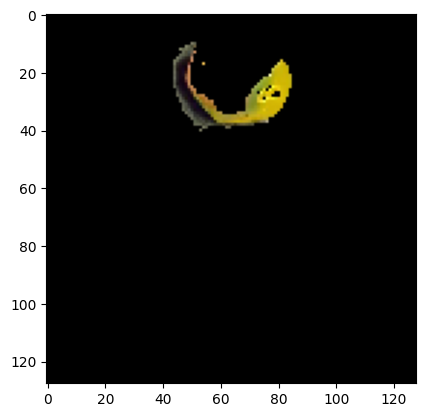

In [147]:
x = preprocess(np.array(sample), 255)
n_map = next(num_mask)

x[:,:,0] *= labeled_mask[:,:,n_map]
x[:,:,1] *= labeled_mask[:,:,n_map]
x[:,:,2] *= labeled_mask[:,:,n_map]

plt.imshow(x)
plt.show()

In [193]:
msk = labeled_mask[:, :, 0]
size = labeled_mask.shape[0]

blank = np.zeros((size, size, 1), dtype='int')
msk = np.array(msk[:, :, np.newaxis], dtype='int') * 255

In [194]:
msk = np.concatenate((msk, blank, blank), axis=-1)

In [203]:
msk_image = Image.fromarray(msk, mode="RGB")
msk_image = msk_image.resize((480,480))

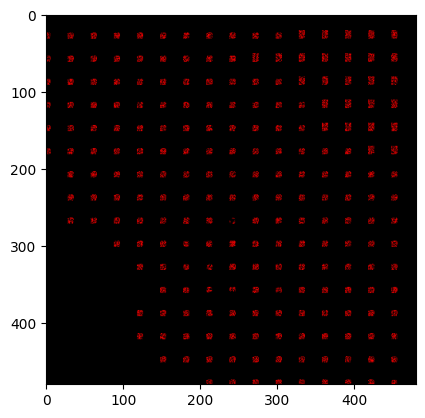

In [210]:
plt.imshow(np.array(sample_img_original)*np.array(msk_image))

In [149]:
def get_anchors(labeled_mask):
    clusters = labeled_mask.shape[2]

    anchors = []
    for cluster in range(clusters):
        yx_locs = np.where(labeled_mask[:,:, cluster])

        x_center = int(np.mean(yx_locs[1]))
        y_center = int(np.mean(yx_locs[0]))

        dx = np.ceil((np.max(yx_locs[1]) - np.min(yx_locs[1]))/2.)
        dy = np.ceil((np.max(yx_locs[0]) - np.min(yx_locs[0]))/2.)

        if dx < dy:
            dh = int(dy)
        else:
            dh = int(dx)

        anchors.append([x_center, y_center, dh])
    
    return anchors


get_anchors(labeled_mask=labeled_mask)

[[120, 9, 14],
 [63, 28, 20],
 [51, 86, 19],
 [119, 117, 14],
 [3, 104, 5],
 [12, 120, 5]]

[3, 104, 5]
3 104 30


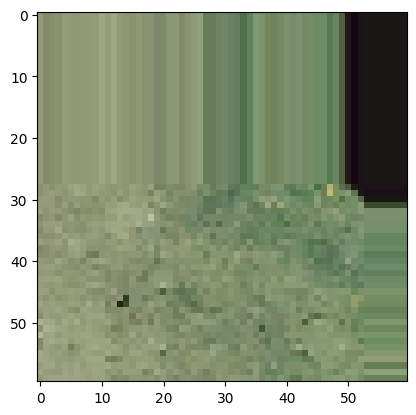

In [164]:
x = preprocess(np.array(sample), 255)

anchor = get_anchors(labeled_mask=labeled_mask)[4]
print(anchor)

x_center = anchor[0]
y_center = anchor[1]
h = 30 #anchor[2]

print(x_center, y_center, h)
slice = np.zeros(shape=(2*h, 2*h, 3))

size = x.shape[0]

for j in range(2*h):
    for i in range(2*h):
        x_pix = x_center - h + i
        y_pix = y_center - h + j

        if x_pix < 0:
            x_pix = 0
        elif x_pix > size-1:
            x_pix = size-1

        if y_pix < 0:
            y_pix = 0
        elif y_pix > size-1:
            y_pix = size-1    

        slice[i, j, :] = x[y_pix, x_pix, :]

plt.imshow(slice)


In [137]:
# detection_model.predict(np.array([slice]))

InvalidArgumentError: Graph execution error:

Detected at node 'model_1/flatten_1/Reshape' defined at (most recent call last):
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_9649/517343541.py", line 1, in <module>
      detection_model.predict(np.array([slice]))
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/engine/training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/engine/training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/engine/training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/engine/training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/engine/training.py", line 1791, in predict_step
      return self(x, training=False)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/homw/winx/.conda/envs/dice-detection/lib/python3.8/site-packages/keras/layers/reshaping/flatten.py", line 98, in call
      return tf.reshape(inputs, flattened_shape)
Node: 'model_1/flatten_1/Reshape'
Input to reshape is a tensor with 1568 values, but the requested shape requires a multiple of 32768
	 [[{{node model_1/flatten_1/Reshape}}]] [Op:__inference_predict_function_7761]

In [125]:
slice

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1

In [49]:
# train_path = f"{start_path}/train/"
# val_path = f"{start_path}/valid/"

# train_gen = ImageDataGenerator(preprocessing_function=preprocess, #rescale=1./255)
# #     width_shift_range=0.2,
# #     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# train_dataset = train_gen.flow_from_directory(directory=train_path,
#                                               target_size=(img_size, img_size),
# #                                               classes=['dicesback'],
#                                               class_mode='categorical',
#                                               shuffle=True,
#                                               batch_size=64)

# valid_gen = ImageDataGenerator(preprocessing_function=preprocess) #rescale=1./255)
# valid_dataset = valid_gen.flow_from_directory(directory=val_path,
#                                               target_size=(img_size, img_size),
# #                                               classes=['dicesback'],
#                                               class_mode='categorical',
#                                               shuffle=True,
#                                               batch_size=64)

# classes = list(train_dataset.class_indices.keys())

# print(train_dataset.class_indices, classes)

# print(valid_dataset.class_indices, classes)

Found 15083 images belonging to 7 classes.
Found 2901 images belonging to 7 classes.
{'d10': 0, 'd12': 1, 'd20': 2, 'd4': 3, 'd6': 4, 'd8': 5, 'dicesback': 6} ['d10', 'd12', 'd20', 'd4', 'd6', 'd8', 'dicesback']
{'d10': 0, 'd12': 1, 'd20': 2, 'd4': 3, 'd6': 4, 'd8': 5, 'dicesback': 6} ['d10', 'd12', 'd20', 'd4', 'd6', 'd8', 'dicesback']


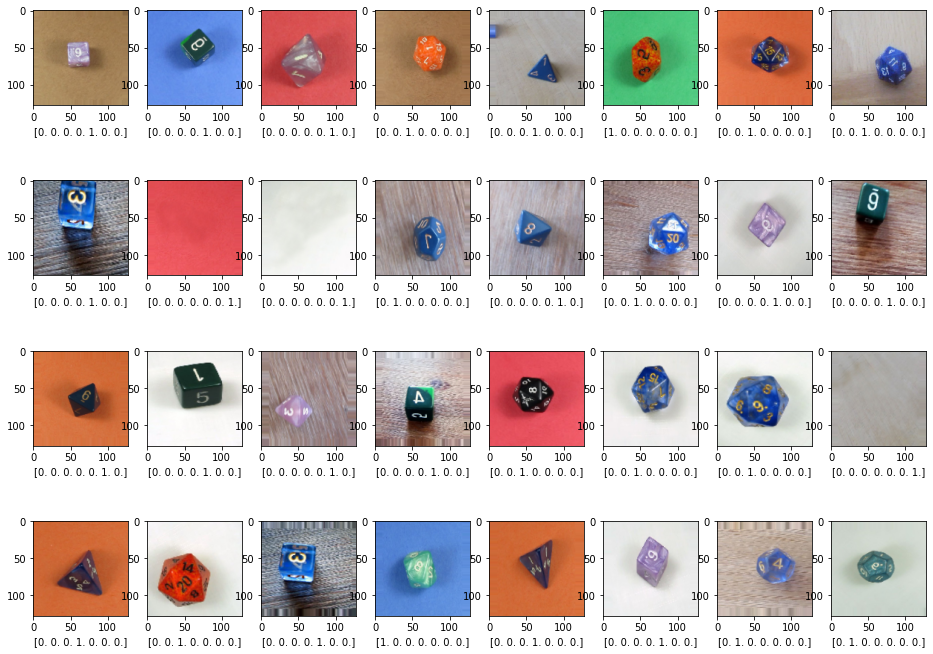

In [255]:
# train_imgs = next(train_dataset)

# fig, axes = plt.subplots(4, 8, figsize=(16,12))
# for i, ax in enumerate(axes.flatten()):
#     ax.imshow(train_imgs[0][i])
#     ax.set_xlabel(train_imgs[1][i])
# # plt.tight_layout()

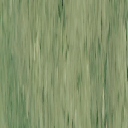

{'d10': 0.016670566,
 'd12': 0.0003228014,
 'd20': 7.8312024e-07,
 'd4': 0.0033022787,
 'd6': 0.000268855,
 'd8': 5.1467425e-05,
 'dicesback': 0.9793833}

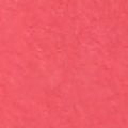

{'d10': 0.0005780891,
 'd12': 0.0019654974,
 'd20': 0.0006315614,
 'd4': 0.0024779493,
 'd6': 0.008259659,
 'd8': 0.032888487,
 'dicesback': 0.9531988}

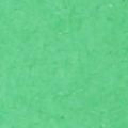

{'d10': 0.0011387565,
 'd12': 0.00011887023,
 'd20': 4.4383114e-07,
 'd4': 0.0030973996,
 'd6': 3.3520384e-05,
 'd8': 2.6916385e-05,
 'dicesback': 0.9955841}

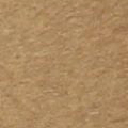

{'d10': 0.0012976964,
 'd12': 0.00043009204,
 'd20': 1.1553105e-07,
 'd4': 0.0006131916,
 'd6': 0.00038796093,
 'd8': 2.831506e-05,
 'dicesback': 0.9972427}

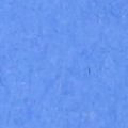

{'d10': 0.0014079778,
 'd12': 0.024777664,
 'd20': 0.0009223966,
 'd4': 0.013347481,
 'd6': 0.01104702,
 'd8': 0.08695102,
 'dicesback': 0.86154646}

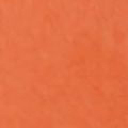

{'d10': 0.0003128271,
 'd12': 3.2702854e-05,
 'd20': 4.7532008e-06,
 'd4': 0.00018147257,
 'd6': 5.6270306e-05,
 'd8': 2.3542923e-05,
 'dicesback': 0.99938846}

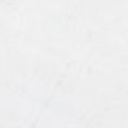

{'d10': 0.012612537,
 'd12': 0.0059177843,
 'd20': 0.0004011745,
 'd4': 0.010081656,
 'd6': 0.23060389,
 'd8': 0.04110741,
 'dicesback': 0.6992756}

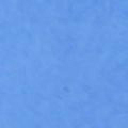

{'d10': 0.004978486,
 'd12': 0.024087632,
 'd20': 0.0015205579,
 'd4': 0.009839623,
 'd6': 0.013283499,
 'd8': 0.17496158,
 'dicesback': 0.7713287}

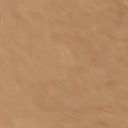

{'d10': 0.0007072705,
 'd12': 0.00019517148,
 'd20': 2.8674368e-08,
 'd4': 0.00023360927,
 'd6': 0.00014135418,
 'd8': 1.5222664e-05,
 'dicesback': 0.9987073}

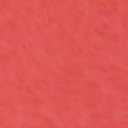

{'d10': 0.0011888314,
 'd12': 0.000430324,
 'd20': 2.9010273e-05,
 'd4': 0.00018062266,
 'd6': 5.0546874e-05,
 'd8': 0.0012179724,
 'dicesback': 0.99690264}

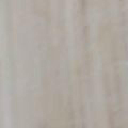

{'d10': 0.016561978,
 'd12': 0.0010701336,
 'd20': 1.8785156e-05,
 'd4': 0.030725457,
 'd6': 0.0018907527,
 'd8': 0.030243507,
 'dicesback': 0.9194893}

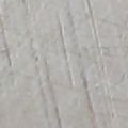

{'d10': 0.054278094,
 'd12': 0.0027572983,
 'd20': 4.5024794e-05,
 'd4': 0.029357756,
 'd6': 0.0014396431,
 'd8': 0.109854065,
 'dicesback': 0.80226815}

In [50]:
def test_samples(model, lst, n_layer):
    
    for sample in lst:
        
        if isinstance(sample, str):
            sample_img_original = download_image(sample)
            sample_img = prepare_image(sample_img_original, (img_size, img_size))

            display(sample_img)

            x = np.array(sample_img)
            X = np.array([x])
            X = preprocess(X, 255)
        elif isinstance(sample, np.ndarray):
            X = np.array([sample])
        
#         display(plt.imshow(X[0]))
        result = model.predict(X)[0]
        
        display(dict(zip(classes, result)))
#         mean_mask, x_center, y_center = get_mask(sample_url, viz_model = model, n_layer=n_layer)
        
#         sample_mask = Image.fromarray(mean_mask)
#         sample_mask.show()
#         display(sample_mask)
#         plt.scatter(x_center, y_center, marker='x', color='r')


test_samples(detection_model, lst_d8)

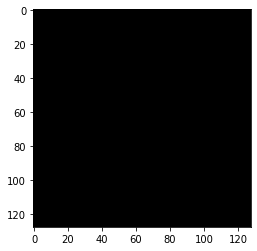

In [239]:
# x = train_imgs[0][11]
# x = np.array(sample_img)*1./255
x = np.array(sample)*1./255
# n_map = 2
x[:,:,0] *= labeled_mask[:,:, anchor]
x[:,:,1] *= labeled_mask[:,:, anchor]
x[:,:,2] *= labeled_mask[:,:, anchor]

plt.imshow(x)